#Proyecto final SOC
####Ela Katherine Shepherd Arévalo
####Belén García Puente
####Víctor Santamaría Gredilla

En este notebook se generaron todas las matrices y sus correspondientes redes en formato .graphml

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import collections as col
import community as com


In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/Shareddrives/SOC/Proyecto_Final/hot100_with_release_date_and_artists.csv') 

##Preparar datos

In [ ]:
df.head()

,Performer,Song,spotify_genre,spotify_track_id,spotify_track_album,danceability,energy,loudness,spotify_track_popularity,release_date,artist_list
0,Andy Williams,......And Roses And Roses,"['adult standards', 'brill building pop', 'eas...",3tvqPPpXyIgKrm4PR9HCf0,The Essential Andy Williams,0.154,0.185,-14.063,38.0,2013-05-10,['Andy Williams']
1,Sandy Nelson,...And Then There Were Drums,"['rock-and-roll', 'space age pop', 'surf music']",1fHHq3qHU8wpRKHzhojZ4a,Compelling Percussion,0.588,0.672,-17.278,11.0,1962-01-01,['Sandy Nelson']
2,Britney Spears,...Baby One More Time,"['dance pop', 'pop', 'post-teen pop']",3MjUtNVVq3C8Fn0MP3zhXa,...Baby One More Time (Digital Deluxe Version),0.759,0.699,-5.745,77.0,1999-01-12,['Britney Spears']
3,Taylor Swift,...Ready For It?,"['pop', 'post-teen pop']",2yLa0QULdQr0qAIvVwN6B5,"{'album_type': 'album', 'artists': [{'external...",0.613,0.764,-6.509,73.0,2017-11-10,['Taylor Swift']
4,Paul Davis,'65 Love Affair,"['album rock', 'bubblegum pop', 'country rock'...",5nBp8F6tekSrnFg8G2Pvug,Radio Hits Of the '80s,0.647,0.686,-4.247,40.0,1979,['Paul Davis']


In [ ]:
df_aux = df['release_date'].str[:4]

In [ ]:
df['release_date_year'] = df_aux

In [ ]:
df = df.drop(['release_date'], axis= 1)

In [ ]:
df.head(20)

,Performer,Song,spotify_genre,spotify_track_id,spotify_track_album,danceability,energy,loudness,spotify_track_popularity,artist_list,release_date_year
0,Andy Williams,......And Roses And Roses,"['adult standards', 'brill building pop', 'eas...",3tvqPPpXyIgKrm4PR9HCf0,The Essential Andy Williams,0.154,0.185,-14.063,38.0,['Andy Williams'],2013
1,Sandy Nelson,...And Then There Were Drums,"['rock-and-roll', 'space age pop', 'surf music']",1fHHq3qHU8wpRKHzhojZ4a,Compelling Percussion,0.588,0.672,-17.278,11.0,['Sandy Nelson'],1962
2,Britney Spears,...Baby One More Time,"['dance pop', 'pop', 'post-teen pop']",3MjUtNVVq3C8Fn0MP3zhXa,...Baby One More Time (Digital Deluxe Version),0.759,0.699,-5.745,77.0,['Britney Spears'],1999
3,Taylor Swift,...Ready For It?,"['pop', 'post-teen pop']",2yLa0QULdQr0qAIvVwN6B5,"{'album_type': 'album', 'artists': [{'external...",0.613,0.764,-6.509,73.0,['Taylor Swift'],2017
4,Paul Davis,'65 Love Affair,"['album rock', 'bubblegum pop', 'country rock'...",5nBp8F6tekSrnFg8G2Pvug,Radio Hits Of the '80s,0.647,0.686,-4.247,40.0,['Paul Davis'],1979
5,Tammy Wynette,'til I Can Make It On My Own,"['country', 'country dawn', 'nashville sound']",0aJHZYjwbfTmeyUWF7zGxI,The Essential Tammy Wynette,0.450,0.294,-12.022,31.0,['Tammy Wynette'],2013
6,Luther Vandross,'Til My Baby Comes Home,"['funk', 'motown', 'neo soul', 'new jack swing...",2R97RZWUx4vAFbMMtmb5Ss,The Night I Fell In Love,0.804,0.714,-6.714,29.0,['Luther Vandross'],1985
7,Keith Urban,'Til Summer Comes Around,"['australian country', 'contemporary country',...",1CKmI1IQjVEVB3F7VmJmM3,Defying Gravity,0.570,0.629,-7.608,42.0,['Keith Urban'],2009
8,After 7,'Til You Do Me Right,"['funk', 'neo soul', 'new jack swing', 'quiet ...",3kGMziz884MLV1oCwrarmN,Reflections,0.612,0.542,-7.563,42.0,['After 7'],1995
9,The Angels,'Til,"['blues rock', 'garage rock', 'modern blues ro...",6cMBpazQUSw6xYiLNYvQzf,Caprice! The Story Behind Gerry Granahan's Cap...,0.253,0.232,-12.695,10.0,['The Angels'],2007


In [ ]:
print ("El menor año es " + min(df_aux) + " y el máximo es " + max(df_aux))


El menor año es 1899 y el máximo es 2021


In [ ]:
df = df[df['release_date_year'] > '1959']
#Analizaremos únicamente a partir del año 1960

In [ ]:
#nº nodos totales = 22832
df.shape

(22832, 11)

In [ ]:
df60s = df[(df['release_date_year'] < '1970') & (df['release_date_year'] > '1959')]
df70s = df[(df['release_date_year'] < '1980') & (df['release_date_year'] > '1969')]
df80s = df[(df['release_date_year'] < '1990') & (df['release_date_year'] > '1979')]
df90s = df[(df['release_date_year'] < '2000') & (df['release_date_year'] > '1989')]
df00s = df[(df['release_date_year'] < '2010') & (df['release_date_year'] > '1999')]
df10s = df[(df['release_date_year'] < '2015') & (df['release_date_year'] > '2009')]
df15s = df[(df['release_date_year'] < '2022') & (df['release_date_year'] > '2014')]

In [ ]:
df60s = df60s.sort_values(by=['spotify_track_popularity'], ascending = False)
df60s = df60s[df60s['spotify_genre'].notna()]
df60s.head()

,Performer,Song,spotify_genre,spotify_track_id,spotify_track_album,danceability,energy,loudness,spotify_track_popularity,artist_list,release_date_year
15719,Brenda Lee,Rockin' Around The Christmas Tree,"['adult standards', 'brill building pop']",2EjXfH91m7f8HiJN1yQg97,Merry Christmas From Brenda Lee,0.589,0.472,-8.749,92.0,['Brenda Lee'],1964
10185,Andy Williams,It's The Most Wonderful Time Of The Year,"['adult standards', 'brill building pop', 'eas...",5hslUAKq9I9CG2bAulFkHN,The Andy Williams Christmas Album,0.240,0.598,-8.435,91.0,['Andy Williams'],1963
15718,Brenda Lee,Rockin' Around The Christmas Tree,"['adult standards', 'brill building pop']",2EjXfH91m7f8HiJN1yQg97,Merry Christmas From Brenda Lee,0.589,0.472,-8.749,90.0,['Brenda Lee'],1964
10184,Andy Williams,It's The Most Wonderful Time Of The Year,"['adult standards', 'brill building pop', 'eas...",5hslUAKq9I9CG2bAulFkHN,The Andy Williams Christmas Album,0.240,0.598,-8.435,89.0,['Andy Williams'],1963
18861,Nat King Cole,The Christmas Song (Merry Christmas To You),['adult standards'],4PS1e8f2LvuTFgUs1Cn3ON,The Christmas Song (Expanded Edition),0.319,0.210,-15.231,87.0,['Nat King Cole'],1962


In [ ]:
df70s = df70s.sort_values(by=['spotify_track_popularity'], ascending = False)
df70s = df70s[df70s['spotify_genre'].notna()]
df70s.head()

,Performer,Song,spotify_genre,spotify_track_id,spotify_track_album,danceability,energy,loudness,spotify_track_popularity,artist_list,release_date_year
7608,AC/DC,Highway To Hell,"['album rock', 'australian rock', 'hard rock',...",2zYzyRzz6pRmhPzyfMEC8s,Highway to Hell,0.573,0.913,-4.793,84.0,['AC/DC'],1979
18167,Lynyrd Skynyrd,Sweet Home Alabama,"['album rock', 'blues rock', 'classic rock', '...",7e89621JPkKaeDSTQ3avtg,Second Helping,0.596,0.605,-12.145,83.0,['Lynyrd Skynyrd'],1974
7883,Eagles,Hotel California,"['album rock', 'classic rock', 'folk rock', 'h...",40riOy7x9W7GXjyGp4pjAv,Hotel California (2013 Remaster),0.579,0.508,-9.484,83.0,['Eagles'],1976
15712,Elton John,Rocket Man,"['glam rock', 'mellow gold', 'piano rock']",3gdewACMIVMEWVbyb8O9sY,Honky Chateau,0.602,0.522,-9.031,82.0,['Elton John'],1972
13021,Electric Light Orchestra,Mr. Blue Sky,"['album rock', 'art rock', 'bow pop', 'classic...",2RlgNHKcydI9sayD2Df2xp,Out of the Blue,0.388,0.338,-10.054,81.0,['Electric Light Orchestra'],1977


In [ ]:
df80s = df80s.sort_values(by=['spotify_track_popularity'], ascending = False)
df80s = df80s[df80s['spotify_genre'].notna()]
df80s.head(15)

,Performer,Song,spotify_genre,spotify_track_id,spotify_track_album,danceability,energy,loudness,spotify_track_popularity,artist_list,release_date_year
22158,Paul McCartney,Wonderful Christmastime,"['album rock', 'classic rock', 'folk rock', 'm...",1SV1fxF65n9NhRHp3KlBuu,McCartney II,0.774,0.511,-8.914,89.0,['Paul McCartney'],1980
15884,Chuck Berry,Run Rudolph Run,"['blues rock', 'classic rock', 'rock', 'rock-a...",2pnPe4pJtq7689i5ydzvJJ,Rock 'N' Roll Rarities,0.688,0.711,-10.453,85.0,['Chuck Berry'],1986
5167,The Police,Every Breath You Take,"['album rock', 'art rock', 'classic rock', 'da...",1JSTJqkT5qHq8MDJnJbRE1,Synchronicity (Remastered 2003),0.820,0.452,-9.796,85.0,['The Police'],1983
18341,a-ha,Take On Me,"['dance rock', 'new romantic', 'new wave', 'ne...",2WfaOiMkCvy7F5fcp2zZ8L,Hunting High and Low,0.573,0.902,-7.638,84.0,['a-ha'],1985
11553,Bon Jovi,Livin' On A Prayer,"['glam metal', 'rock']",37ZJ0p5Jm13JPevGcx4SkF,Slippery When Wet,0.532,0.887,-3.757,84.0,['Bon Jovi'],1986
586,Toto,Africa,"['album rock', 'mellow gold', 'rock', 'soft ro...",2374M0fQpWi3dLnB54qaLX,Toto IV,0.671,0.373,-18.064,84.0,['TOTO'],1982
1539,AC/DC,Back In Black,"['album rock', 'australian rock', 'hard rock',...",08mG3Y1vljYA6bvDt4Wqkj,Back In Black,0.310,0.700,-5.678,84.0,['AC/DC'],1980
18157,Eurythmics,Sweet Dreams (Are Made Of This),"['dance pop', 'dance rock', 'europop', 'mellow...",1TfqLAPs4K3s2rJMoCokcS,Sweet Dreams (Are Made Of This),0.692,0.711,-7.498,82.0,"['Eurythmics', 'Annie Lennox', 'Dave Stewart']",1983
2072,Michael Jackson,Billie Jean,"['pop', 'r&b', 'soul']",5ChkMS8OtdzJeqyybCc9R5,Thriller 25 Super Deluxe Edition,0.920,0.654,-3.051,82.0,['Michael Jackson'],1982
8874,Whitney Houston,I Wanna Dance With Somebody (Who Loves Me),"['dance pop', 'pop', 'r&b']",2tUBqZG2AbRi7Q0BIrVrEj,Whitney,0.709,0.824,-8.824,81.0,['Whitney Houston'],1987


In [ ]:
df90s = df90s.sort_values(by=['spotify_track_popularity'], ascending = False)
df90s = df90s[df90s['spotify_genre'].notna()]
df90s.head()

,Performer,Song,spotify_genre,spotify_track_id,spotify_track_album,danceability,energy,loudness,spotify_track_popularity,artist_list,release_date_year
796,Mariah Carey,All I Want For Christmas Is You,"['dance pop', 'pop', 'r&b', 'urban contemporary']",0bYg9bo50gSsH3LtXe2SQn,Merry Christmas,0.335,0.625,-7.462,97.0,['Mariah Carey'],1994
795,Mariah Carey,All I Want For Christmas Is You,"['dance pop', 'pop', 'r&b', 'urban contemporary']",0bYg9bo50gSsH3LtXe2SQn,Merry Christmas,0.335,0.625,-7.462,95.0,['Mariah Carey'],1994
10324,Bobby Helms,Jingle Bell Rock,['adult standards'],3hBXvHLlTHvnbwrPbeoyAj,The Classic Years: 1956-1962,0.754,0.424,-8.463,91.0,['Bobby Helms'],1992
10323,Bobby Helms,Jingle Bell Rock,['adult standards'],3hBXvHLlTHvnbwrPbeoyAj,The Classic Years: 1956-1962,0.754,0.424,-8.463,89.0,['Bobby Helms'],1992
10070,Perry Como & The Fontane Sisters,It's Beginning To Look A Lot Like Christmas,"['adult standards', 'brill building pop', 'eas...",2pXpURmn6zC5ZYDMms6fwa,Greatest Christmas Songs,0.725,0.276,-12.250,87.0,"['Perry Como', 'The Fontane Sisters', 'Mitchel...",1999


In [ ]:
df00s = df00s.sort_values(by=['spotify_track_popularity'], ascending = False)
df00s = df00s[df00s['spotify_genre'].notna()]
df00s.head()

,Performer,Song,spotify_genre,spotify_track_id,spotify_track_album,danceability,energy,loudness,spotify_track_popularity,artist_list,release_date_year
10888,Wham!,Last Christmas,"['dance rock', 'new wave pop']",6wn2nmFn3wDuiMldRiuRuL,Twenty Five,0.757,0.618,-7.964,89.0,['Wham!'],2006
10887,Wham!,Last Christmas,['new wave pop'],6wn2nmFn3wDuiMldRiuRuL,Twenty Five,0.757,0.618,-7.964,88.0,['Wham!'],2006
4314,Band-Aid,Do They Know It's Christmas?,[],0247StOpd3AkeBQzANX4Zf,Do They Know It's Christmas?,0.599,0.642,-6.936,86.0,['Band Aid'],2004
9767,Linkin Park,In The End,"['alternative metal', 'nu metal', 'post-grunge...",60a0Rd6pjrkxjPbaKzXjfq,Hybrid Theory (Bonus Edition),0.542,0.853,-6.407,84.0,['Linkin Park'],2000
22329,Coldplay,Yellow,"['permanent wave', 'pop']",3AJwUDP919kvQ9QcozQPxg,Parachutes,0.429,0.661,-7.227,83.0,['Coldplay'],2000


In [ ]:
df10s = df10s.sort_values(by=['spotify_track_popularity'], ascending = False)
df10s = df10s[df10s['spotify_genre'].notna()]
df10s.head(20)

,Performer,Song,spotify_genre,spotify_track_id,spotify_track_album,danceability,energy,loudness,spotify_track_popularity,artist_list,release_date_year
16042,Ariana Grande,Santa Tell Me,"['dance pop', 'pop', 'post-teen pop']",0lizgQ7Qw35od7CYaoMBZb,Santa Tell Me,0.506,0.628,-7.316,94.0,['Ariana Grande'],2014
12814,Justin Bieber,Mistletoe,"['canadian pop', 'dance pop', 'pop', 'post-tee...",7xapw9Oy21WpfEcib2ErSA,Under The Mistletoe (Deluxe Edition),0.658,0.560,-9.049,91.0,['Justin Bieber'],2011
10069,Michael Buble,It's Beginning To Look A Lot Like Christmas,"['adult standards', 'canadian pop', 'lounge']",5a1iz510sv2W9Dt1MvFd5R,Christmas (Deluxe Special Edition),0.350,0.232,-11.042,90.0,['Michael Bublé'],2012
7046,John & Yoko/The Plastic Ono Band With The Harl...,Happy Xmas (War Is Over),"['neo mellow', 'pop', 'pop rock', 'singer-song...",3zJw3rugfpVrmBeDDnUYzy,Power To The People - The Hits,0.328,0.607,-11.076,90.0,"['John Lennon', 'The Harlem Community Choir', ...",2010
7136,Sam Smith,Have Yourself A Merry Little Christmas,"['pop', 'uk pop']",1Qi2wh8fFgDV7tl4Sj3f2K,Have Yourself A Merry Little Christmas,0.399,0.181,-9.409,88.0,['Sam Smith'],2014
835,John Legend,All Of Me,"['neo mellow', 'neo soul', 'pop', 'r&b', 'urba...",3U4isOIWM3VvDubwSI3y7a,Love In The Future (Expanded Edition),0.422,0.264,-7.064,87.0,['John Legend'],2013
3191,Coldplay,Christmas Lights,"['permanent wave', 'pop']",4fzyvSu73BhGvi96p2zwjL,Christmas Lights,0.312,0.418,-9.146,86.0,['Coldplay'],2010
20839,Avicii,Wake Me Up!,"['big room', 'edm', 'pop']",4h8VwCb1MTGoLKueQ1WgbD,1,0.518,0.784,-5.659,85.0,['Avicii'],2013
17635,Sam Smith,Stay With Me,"['pop', 'uk pop']",5Nm9ERjJZ5oyfXZTECKmRt,In The Lonely Hour,0.418,0.420,-6.444,85.0,['Sam Smith'],2014
14711,Ed Sheeran,Photograph,"['pop', 'uk pop']",1HNkqx9Ahdgi1Ixy2xkKkL,x (Deluxe Edition),0.614,0.379,-10.480,85.0,['Ed Sheeran'],2014


In [ ]:
df15s = df15s.sort_values(by=['spotify_track_popularity'], ascending = False)
df15s = df15s[df15s['spotify_genre'].notna()]
df15s.head(20)

,Performer,Song,spotify_genre,spotify_track_id,spotify_track_album,danceability,energy,loudness,spotify_track_popularity,artist_list,release_date_year
3835,Tones And I,Dance Monkey,['australian pop'],2XU0oxnq2qxCpomAAuJY8K,Dance Monkey (Stripped Back) / Dance Monkey,0.824,0.588,-6.400,100.0,['Tones And I'],2019
12895,Lil Nas X,Montero (Call Me By Your Name),"['country rap', 'lgbtq+ hip hop', 'pop rap', '...",67BtfxlNbhBmCDR2L2l8qd,"{'album_type': 'single', 'artists': [{'externa...",0.610,0.508,-6.682,100.0,['Lil Nas X'],2021
15836,Arizona Zervas,Roxanne,['pop rap'],696DnlkuDOXcMAnKlTgXXK,ROXANNE,0.621,0.601,-5.616,99.0,['Arizona Zervas'],2019
3220,Post Malone,Circles,"['dfw rap', 'melodic rap', 'rap']",21jGcNKet2qwijlDFuPiPb,Hollywood's Bleeding,0.695,0.762,-3.497,98.0,['Post Malone'],2019
12627,Maroon 5,Memories,"['pop', 'pop rock']",2b8fOow8UzyDFAE27YhOZM,Memories,0.764,0.320,-7.209,98.0,['Maroon 5'],2019
20466,Karol G & Nicki Minaj,Tusa,"['latin', 'reggaeton']",7k4t7uLgtOxPwTpFmtJNTY,Tusa,0.803,0.715,-3.280,97.0,"['KAROL G', 'Nicki Minaj']",2019
5424,Trevor Daniel,Falling,"['alternative r&b', 'melodic rap']",4TnjEaWOeW0eKTKIEvJyCa,Falling,0.784,0.430,-8.756,97.0,['Trevor Daniel'],2018
4618,Dua Lipa,Don't Start Now,"['dance pop', 'pop', 'post-teen pop', 'uk pop']",6WrI0LAC5M1Rw2MnX2ZvEg,Don't Start Now,0.794,0.793,-4.521,97.0,['Dua Lipa'],2019
5280,Billie Eilish,everything i wanted,"['electropop', 'pop']",3ZCTVFBt2Brf31RLEnCkWJ,everything i wanted,0.704,0.225,-14.454,97.0,['Billie Eilish'],2019
11769,Selena Gomez,Lose You To Love Me,"['dance pop', 'pop', 'post-teen pop']",1HfMVBKM75vxSfsQ5VefZ5,Lose You To Love Me,0.505,0.340,-9.005,96.0,['Selena Gomez'],2019


In [ ]:
print("60s -> " , df60s.shape)
print("70s -> " , df70s.shape)
print("80s -> " , df80s.shape)
print("90s -> " , df90s.shape)
print("00s -> " , df00s.shape)
print("10s -> " , df10s.shape)
print("15s -> " , df15s.shape)

60s ->  (1897, 11)
70s ->  (2661, 11)
80s ->  (2770, 11)
90s ->  (3563, 11)
00s ->  (5109, 11)
10s ->  (2950, 11)
15s ->  (3739, 11)


##60s

1897 elementos

In [ ]:
#SACAR LISTA DE GÉNEROS POR ORDEN ALFABÉTICO DE CADA DÉCADA -> AQUÍ ABAJO ESTÁ HECHA LOS 60
genrelist60s = []

for x in range(1897):
  aux = df60s.iloc[x]['spotify_genre']
  aux = aux.translate({ord(i): None for i in '[]'})
  aux = aux.replace("'","");
  aux = aux.split(',')
  genrelist60s = genrelist60s + aux

genrelist60sCLEAN = []
for x in genrelist60s:
  x = x.lstrip(" ")
  genrelist60sCLEAN.append(x)

genrelist60sCLEAN = list(dict.fromkeys(genrelist60sCLEAN))
genrelist60s = []
genrelist60s = sorted(genrelist60sCLEAN)
del genrelist60s[0] 
#genrelist60s



In [ ]:
#SACAR LISTA DE ARTISTAS POR ORDEN ALFABÉTICO DE CADA DÉCADA -> AQUÍ ABAJO ESTÁ HECHA LOS 60
artistlist60s = []

for x in range(1897):
  aux = df60s.iloc[x]['artist_list']
  aux = aux.translate({ord(i): None for i in '[]'})
  aux = aux.replace('"',"");
  aux = aux.replace("'","");
  aux = aux.split(',')
  artistlist60s = artistlist60s + aux

artistlist60sCLEAN = []
for x in artistlist60s:
  x = x.lstrip(" ")
  artistlist60sCLEAN.append(x)

artistlist60sCLEAN = list(dict.fromkeys(artistlist60sCLEAN))
artistlist60s = []
artistlist60s = sorted(artistlist60sCLEAN)
#artistlist60s

In [ ]:
artistlist60s

['? & The Mysterians',
 'Adam Faith',
 'Al Green',
 'Al Hirt',
 'Al Martino',
 'Alex Orbison',
 'Allan Sherman',
 'Andy Kim',
 'Andy Williams',
 'Ann-Margret',
 'Anne Murray',
 'Annette Funicello',
 'Archie Bell & The Drells',
 'Aretha Franklin',
 'Arthur Conley',
 'Arthur Lyman',
 'B.B. King',
 'Baby Washington',
 'Barbara Lewis',
 'Barbara Lynn',
 'Barbara Mason',
 'Barbra Streisand',
 'Barry McGuire',
 'Beaky',
 'Bee Gees',
 'Ben E. King',
 'Bernard Pretty Purdie',
 'Betty Everett',
 'Betty Harris',
 'Betty Wright',
 'Big Brother & The Holding Company',
 'Bill Cosby',
 'Billy Joe Royal',
 'Billy Preston',
 'Billy Stewart',
 'Billy Strange',
 'Blood',
 'Blue Cheer',
 'Bo Diddley',
 'Bob Dylan',
 'Bob Seger',
 'Bobbie Gentry',
 'Bobby Bare',
 'Bobby Blue Bland',
 'Bobby Darin',
 'Bobby Goldsboro',
 'Bobby Hart',
 'Bobby Hebb',
 'Bobby Powell',
 'Bobby Rydell',
 'Bobby Vee',
 'Bobby Vinton',
 'Bobby Womack',
 'Booker T. & the M.G.s',
 'Boots Randolph',
 'Boris Karloff',
 'Brenda Lee',


##70s

2661 elementos

In [ ]:
genrelist70s = []

for x in range(2661):
  aux = df70s.iloc[x]['spotify_genre']
  aux = aux.translate({ord(i): None for i in '[]'})
  aux = aux.replace("'","");
  aux = aux.split(',')
  genrelist70s = genrelist70s + aux

genrelist70sCLEAN = []
for x in genrelist70s:
  x = x.lstrip(" ")
  genrelist70sCLEAN.append(x)

genrelist70sCLEAN = list(dict.fromkeys(genrelist70sCLEAN))
genrelist70s = []
genrelist70s = sorted(genrelist70sCLEAN)
del genrelist70s[0] 
#genrelist70s



In [ ]:
artistlist70s = []

for x in range(2661):
  aux = df70s.iloc[x]['artist_list']
  aux = aux.translate({ord(i): None for i in '[]'})
  aux = aux.replace('"',"");
  aux = aux.replace("'","");
  aux = aux.split(',')
  artistlist70s = artistlist70s + aux

artistlist70sCLEAN = []
for x in artistlist70s:
  x = x.strip(" ")
  artistlist70sCLEAN.append(x)

artistlist70sCLEAN = list(dict.fromkeys(artistlist70sCLEAN))
artistlist70s = []
artistlist70s = sorted(artistlist70sCLEAN)
#artistlist70s

In [ ]:
artistlist70s

['10cc',
 '38 Special',
 '5000 Volts',
 'A Taste Of Honey',
 'ABBA',
 'AC/DC',
 'Ace',
 'Ace Frehley',
 'Ace Spectrum',
 'Aerosmith',
 'Afrique',
 'After The Fire',
 'Al Green',
 'Al Stewart',
 'Al Wilson',
 'Alan Parsons',
 'Albert Hammond',
 'Alice Cooper',
 'Alive N Kickin',
 'Allman Brothers Band',
 'Amazing Rhythm Aces',
 'Ambrosia',
 'America',
 'Andrew Gold',
 'Andy Gibb',
 'Andy Macpherson',
 'Andy Williams',
 'Angel',
 'Anita Ward',
 'Ann Peebles',
 'Anne Murray',
 'April Wine',
 'Aretha Franklin',
 'Argent',
 'Art Garfunkel',
 'Ashford & Simpson',
 'Atlanta Rhythm Section',
 'Audience',
 'Austin Roberts',
 'Average White Band',
 'B.B. King',
 'B.J. Thomas',
 'B.T. Express',
 'Bachman-Turner Overdrive',
 'Bad Company',
 'Badfinger',
 'Bang',
 'Barbra Streisand',
 'Barry Manilow',
 'Barry White',
 'Bay City Rollers',
 'Bee Gees',
 'Bette Midler',
 'Betty Wright',
 'Bill LaBounty',
 'Bill Withers',
 'Billy Griffin',
 'Billy Joe Royal',
 'Billy Joel',
 'Billy Paul',
 'Billy Prest

##80s

2770 elementos

In [ ]:
genrelist80s = []

for x in range(2770):
  aux = df80s.iloc[x]['spotify_genre']
  aux = aux.translate({ord(i): None for i in '[]'})
  aux = aux.replace("'","");
  aux = aux.split(',')
  genrelist80s = genrelist80s + aux

genrelist80sCLEAN = []
for x in genrelist80s:
  x = x.lstrip(" ")
  genrelist80sCLEAN.append(x)

genrelist80sCLEAN = list(dict.fromkeys(genrelist80sCLEAN))
genrelist80s = []
genrelist80s = sorted(genrelist80sCLEAN)
del genrelist80s[0] 
#genrelist80s

In [ ]:
artistlist80s = []

for x in range(2770):
  aux = df80s.iloc[x]['artist_list']
  aux = aux.translate({ord(i): None for i in '[]'})
  aux = aux.replace('"',"");
  aux = aux.replace("'","");
  aux = aux.split(',')
  artistlist80s = artistlist80s + aux

artistlist80sCLEAN = []
for x in artistlist80s:
  x = x.lstrip(" ")
  artistlist80sCLEAN.append(x)

artistlist80sCLEAN = list(dict.fromkeys(artistlist80sCLEAN))
artistlist80s = []
artistlist80s = sorted(artistlist80sCLEAN)
#artistlist80s

In [ ]:
artistlist80s

['1927',
 '38 Special',
 'A Flock Of Seagulls',
 'ABBA',
 'ABC',
 'AC/DC',
 'Aaron Neville',
 'Adam Ant',
 'Adrian Belew',
 'Aerosmith',
 'Afrika Bambaataa',
 'After 7',
 'After The Fire',
 'Agnetha Fältskog',
 'Air Supply',
 'Al B. Sure!',
 'Al Jarreau',
 'Alabama',
 'Alan Jackson',
 'Alannah Myles',
 'Aldo Nova',
 'Alessi Brothers',
 'Alexander ONeal',
 'Alice Cooper',
 'Alison Moyet',
 'Allman Brothers Band',
 'Alphaville',
 'Amazulu',
 'Ambrosia',
 'America',
 'Amy Grant',
 'Andy Gibb',
 'Anne Murray',
 'Annie Lennox',
 'April Wine',
 'Arcadia',
 'Aretha Franklin',
 'Art Garfunkel',
 'Ashford & Simpson',
 'Asia',
 'Atlanta Rhythm Section',
 'Atlantic Starr',
 'Auburn Marching Bnad',
 'Auburn University Marching Band',
 'Aurra',
 'Autograph',
 'Axe',
 'B.J. Thomas',
 'Babyface',
 'Bad Company',
 'Bad English',
 'Balance',
 'Baltimora',
 'Barbara Mitchell',
 'Barbra Streisand',
 'Bardeux',
 'Barry Gibb',
 'Barry Manilow',
 'Basia',
 'Beastie Boys',
 'Bee Gees',
 'Belinda Carlisle',
 

##90s

3563 elementos

In [ ]:
genrelist90s = []

for x in range(3563):
  aux = df90s.iloc[x]['spotify_genre']
  aux = aux.translate({ord(i): None for i in '[]'})
  aux = aux.replace("'","");
  aux = aux.split(',')
  genrelist90s = genrelist90s + aux

genrelist90sCLEAN = []
for x in genrelist90s:
  x = x.lstrip(" ")
  genrelist90sCLEAN.append(x)

genrelist90sCLEAN = list(dict.fromkeys(genrelist90sCLEAN))
genrelist90s = []
genrelist90s = sorted(genrelist90sCLEAN)
del genrelist90s[0] 
#genrelist90s

In [ ]:
artistlist90s = []

for x in range(3563):
  aux = df90s.iloc[x]['artist_list']
  aux = aux.translate({ord(i): None for i in '[]'})
  aux = aux.replace('"',"");
  aux = aux.replace("'","");
  aux = aux.split(',')
  artistlist90s = artistlist90s + aux

artistlist90sCLEAN = []
for x in artistlist90s:
  x = x.lstrip(" ")
  artistlist90sCLEAN.append(x)

artistlist90sCLEAN = list(dict.fromkeys(artistlist90sCLEAN))
artistlist90s = []
artistlist90s = sorted(artistlist90sCLEAN)
#artistlist90s

In [ ]:
artistlist90s

['*NSYNC',
 '112',
 '2 In A Room',
 '20 Fingers',
 '2Pac',
 '2nd II None',
 '38 Special',
 '3T',
 '3rd Bass',
 '4 Non Blondes',
 '4.0',
 '69 Boyz',
 '702',
 '8Ball',
 '95 South',
 '98º',
 'A Few Good Men',
 'A Tribe Called Quest',
 'A. Manetta',
 'A.l.t.',
 'AC/DC',
 'AZ',
 'Aaliyah',
 'Aaron Hall',
 'Aaron Neville',
 'Aaron Tippin',
 'Abra Moore',
 'Ace of Base',
 'Adam Ant',
 'Adam Sandler',
 'Adina Howard',
 'Aerosmith',
 'After 7',
 'Aimee Mann',
 'Al B. Sure!',
 'Al Martino',
 'Alan Jackson',
 'Alan Wilder',
 'Alana Davis',
 'Alanis Morissette',
 'Alexander ONeal',
 'Alfonzo Hunter',
 'Alice Cooper',
 'Alicia Bridges',
 'Alison Krauss & Union Station',
 'All-4-One',
 'Amanda Marshall',
 'Amber',
 'Amil',
 'Amy Grant',
 'Anastacia',
 'Andrea True Connection',
 'Andru Donalds',
 'Andy Griggs',
 'Andy Stewart',
 'Andy Williams',
 'Angelina',
 'Angie Martinez',
 'Angie Stone',
 'Animotion',
 'Anne Murray',
 'Annie Lennox',
 'Another Bad Creation',
 'Anything Box',
 'Apache',
 'April W

##00s

5109 elementos

In [ ]:
genrelist00s = []

for x in range(5109):
  aux = df00s.iloc[x]['spotify_genre']
  aux = aux.translate({ord(i): None for i in '[]'})
  aux = aux.replace("'","");
  aux = aux.split(',')
  genrelist00s = genrelist00s + aux

genrelist00sCLEAN = []
for x in genrelist00s:
  x = x.lstrip(" ")
  genrelist00sCLEAN.append(x)

genrelist00sCLEAN = list(dict.fromkeys(genrelist00sCLEAN))
genrelist00s = []
genrelist00s = sorted(genrelist00sCLEAN)
del genrelist00s[0] #eliminar elemento ''
#genrelist00s


In [ ]:
artistlist00s = []

for x in range(5109):
  aux = df00s.iloc[x]['artist_list']
  aux = aux.translate({ord(i): None for i in '[]'})
  aux = aux.replace('"',"");
  aux = aux.replace("'","");
  aux = aux.split(',')
  artistlist00s = artistlist00s + aux

artistlist00sCLEAN = []
for x in artistlist00s:
  x = x.lstrip(" ")
  artistlist00sCLEAN.append(x)

artistlist00sCLEAN = list(dict.fromkeys(artistlist00sCLEAN))
artistlist00s = []
artistlist00s = sorted(artistlist00sCLEAN)
#artistlist00s

In [ ]:
artistlist00s

['& Skip',
 '+44',
 '10 Years',
 '112',
 '2 Pistols',
 '2 Unlimited',
 '2Pac',
 '2gether',
 '3 Doors Down',
 '311',
 '38 Special',
 '3LW',
 '3OH!3',
 '50 Cent',
 '504 Boyz',
 '7 Aurelius',
 'A Flock Of Seagulls',
 'A Perfect Circle',
 'A Rocket To The Moon',
 'A Taste Of Honey',
 'A Tribe Called Quest',
 'A*Teens',
 'ABBA',
 'AFI',
 'ATC',
 'Aaliyah Tribute',
 'Aaries',
 'Aaron Carter',
 'Aaron Lines',
 'Aaron Neville',
 'Aaron Tippin',
 'Ace Cannon',
 'Ace Hood',
 'Adam Gontier',
 'Adam Lambert',
 'Adam Levine',
 'Adele',
 'Adina Howard',
 'Aerosmith',
 'Afroman',
 'Air Supply',
 'Akon',
 'Al Jarreau',
 'Al Martino',
 'Al Stewart',
 'Alabama',
 'Alan Jackson',
 'Alanis Morissette',
 'Albert King',
 'Alejandro Sanz',
 'Ali',
 'Ali & Gipp',
 'Alice In Chains',
 'Alicia Bridges',
 'Alicia Keys',
 'Alien Ant Farm',
 'Alisha',
 'Alison Krauss',
 'All Star Tribute',
 'All Time Low',
 'All-4-One',
 'Allan Sherman',
 'Allen Gordon',
 'Alvin & The Chipmunks',
 'Aly & AJ',
 'Amanda',
 'Amanda P

##10s

2950 elementos

In [ ]:
genrelist10s = []

for x in range(2950):
  aux = df10s.iloc[x]['spotify_genre']
  aux = aux.translate({ord(i): None for i in '[]'})
  aux = aux.replace("'","");
  aux = aux.split(',')
  genrelist10s = genrelist10s + aux

genrelist10sCLEAN = []
for x in genrelist10s:
  x = x.lstrip(" ")
  genrelist10sCLEAN.append(x)

genrelist10sCLEAN = list(dict.fromkeys(genrelist10sCLEAN))
genrelist10s = []
genrelist10s = sorted(genrelist10sCLEAN)
del genrelist10s[0] #eliminar elemento ''
#genrelist10s


In [ ]:
artistlist10s = []

for x in range(2950):
  aux = df10s.iloc[x]['artist_list']
  aux = aux.translate({ord(i): None for i in '[]'})
  aux = aux.replace('"',"");
  aux = aux.replace("'","");
  aux = aux.split(',')
  artistlist10s = artistlist10s + aux

artistlist10sCLEAN = []
for x in artistlist10s:
  x = x.lstrip(" ")
  artistlist10sCLEAN.append(x)

artistlist10sCLEAN = list(dict.fromkeys(artistlist10sCLEAN))
artistlist10s = []
artistlist10s = sorted(artistlist10sCLEAN)
#artistlist10s

In [ ]:
artistlist10s

['#1 Garth Brooks Tribute Band',
 '*NSYNC',
 '2 Chainz',
 '2 Unlimited',
 '2CELLOS',
 '2Pac',
 '3 Doors Down',
 '3OH!3',
 '5 Seconds of Summer',
 '50 Cent',
 'A Great Big World',
 'A$AP Ferg',
 'A$AP Rocky',
 'A.R. Rahman',
 'AC/DC',
 'AJR',
 'AWOLNATION',
 'Aaliyah',
 'Aaron Lewis',
 'Ace Hood',
 'Adam Lambert',
 'Adam Levine',
 'Adele',
 'Afrojack',
 'Agatha Lee Monn',
 'Akon',
 'Alabama',
 'Alabama Shakes',
 'Alan Jackson',
 'Albert King',
 'Alejandro Sanz',
 'Alesso',
 'Alex Clare',
 'Alexandra Stan',
 'Alexis Jordan',
 'Alice Deejay',
 'Alicia Keys',
 'Alison Krauss',
 'Alison Moyet',
 'Allan Sherman',
 'Aloe Blacc',
 'Alpha Rev',
 'AlunaGeorge',
 'Alvin Cash',
 'Amanda Brown',
 'Amber Carrington',
 'Amber Coffman',
 'America',
 'American Authors',
 'Amii Stewart',
 'Amy Holland',
 'Amy Winehouse',
 'Andrea True Connection',
 'Andrew Lloyd Webber',
 'Andrew McMahon in the Wilderness',
 'André 3000',
 'Andy G and The Roller Kings',
 'Andy Grammer',
 'Andy Williams',
 'Angaleena Pre

##15s

3739 elementos

In [ ]:
genrelist15s = []

for x in range(3739):
  aux = df15s.iloc[x]['spotify_genre']
  aux = aux.translate({ord(i): None for i in '[]'})
  aux = aux.replace("'","");
  aux = aux.split(',')
  genrelist15s = genrelist15s + aux

genrelist15sCLEAN = []
for x in genrelist15s:
  x = x.lstrip(" ")
  genrelist15sCLEAN.append(x)

genrelist15sCLEAN = list(dict.fromkeys(genrelist15sCLEAN))
genrelist15s = []
genrelist15s = sorted(genrelist15sCLEAN)
del genrelist15s[0] #eliminar elemento ''
#genrelist15s


In [ ]:
artistlist15s = []

for x in range(3739):
  aux = df15s.iloc[x]['artist_list']
  aux = aux.translate({ord(i): None for i in '[]'})
  aux = aux.replace('"',"");
  aux = aux.replace("'","");
  aux = aux.split(',')
  artistlist15s = artistlist15s + aux

artistlist15sCLEAN = []
for x in artistlist15s:
  x = x.lstrip(" ")
  artistlist15sCLEAN.append(x)

artistlist15sCLEAN = list(dict.fromkeys(artistlist15sCLEAN))
artistlist15s = []
artistlist15s = sorted(artistlist15sCLEAN)
#artistlist15s

In [ ]:
artistlist15s

['2 Chainz',
 '2 In A Room',
 '21 Savage',
 '24kGoldn',
 '3OH!3',
 '5 Seconds of Summer',
 '50 Cent',
 '6LACK',
 '6ix9ine',
 '99 Percent',
 '9lokknine',
 'A Boogie Wit da Hoodie',
 'A Day To Remember',
 'A Great Big World',
 'A Thousand Horses',
 'A Tribe Called Quest',
 'A$AP Ferg',
 'A$AP Rocky',
 'AJR',
 'ALISA UENO',
 'AURORA',
 'Aaliyah',
 'Abba Experience',
 'Action Bronson',
 'Adam Lambert',
 'Adam Levine',
 'Adam Wade',
 'Adam Wakefield',
 'Adele',
 'Agust D',
 'Air Supply',
 'Al Martino',
 'Al Wilson',
 'Alan Jackson',
 'Alan Walker',
 'Alec Benjamin',
 'Alessia Cara',
 'Alesso',
 'Alex Lacamoire',
 'Ali Gatie',
 'Ali Thomson',
 'Alice Merton',
 'Alicia Keys',
 'Alissa Violet',
 'All Saints',
 'Allan Kingdom',
 'Aloe Blacc',
 'Ambjaay',
 'Aminé',
 'Ana Villafañe',
 'Andrea True Connection',
 'Andrew Gold',
 'Andy Gibb',
 'Andy Grammer',
 'Angie Stone',
 'Anita Baker',
 'Anita Bryant',
 'Ann-Margret',
 'Anna Wise',
 'Anne Murray',
 'Anne-Marie',
 'Ant Clemons',
 'Ant Saunders',

##Generación de redes

In [ ]:
#SOLO CAMBIAR ESTA CELDA PARA DISTINTOS VALORES
numberofnodes = 3563
artistlisttestCLEAN = artistlist90s
dftest = df90s

In [ ]:
df_artistas_test = pd.DataFrame(index = artistlisttestCLEAN)
for a in artistlisttestCLEAN:
  df_artistas_test[a] = "[]"
#df_artistas_test

In [ ]:
colabs = []
for x in range(numberofnodes):
  artistlisttest = []
  aux = dftest.iloc[x]['artist_list']
  aux = aux.translate({ord(i): None for i in '[]'})
  aux = aux.replace('"',"");
  aux = aux.replace("'","");
  aux = aux.split(',')
  artistlisttest = artistlisttest + aux
  artistlisttest_ = []
  for z in artistlisttest:
    z = z.strip()
    artistlisttest_.append(z)
  artistlisttest = []
  artistlisttest = artistlisttest_
  ##aquí tenemos la lista de artistas de la canción
  genrelisttest = []
  aux = dftest.iloc[x]['spotify_genre']
  aux = aux.translate({ord(i): None for i in '[]'})
  aux = aux.replace("'","");
  aux = aux.split(',')
  genrelisttest = genrelisttest + aux
  #
  genrelisttest_ = []
  for z in genrelisttest:
    z = z.strip()
    genrelisttest_.append(z)
  genrelisttest = []
  genrelisttest = genrelisttest_
  ##aquí tenemos la lista de géneros de la canción
  for a1 in artistlisttest:
    for a2 in artistlisttest:
      if a1 != a2: 
        if (df_artistas_test.at[a1, a2] == "[]"):#AQUÍ CAMBIAR DONDE SE METEN LOS DATOS (MATRIZ ADYACENCIA)
          df_artistas_test.at[a1, a2] = genrelisttest#AQUÍ CAMBIAR DONDE SE METEN LOS DATOS (MATRIZ ADYACENCIA)
        else:
          df_artistas_test.at[a1, a2] = genrelisttest + df_artistas_test.at[a1, a2]#AQUÍ CAMBIAR DONDE SE METEN LOS DATOS (MATRIZ ADYACENCIA)
          colabs.append(x)
        df_artistas_test.at[a1, a2] = list(dict.fromkeys(df_artistas_test.at[a1, a2]))
  colabs = list(dict.fromkeys(colabs))
  #COLABNUM IS THE NUMBER OF COLLABORATIONS IN THAT DECADE
  #In the 60s only 74 collaborations
  #250 collaborations in 15s
  colabnum = len(colabs)
  ##aquí están en común los géneros entre artistas de la misma canción
  #------------------------------CNTRL + K; CNTRL + C TO COMMENT EVERYTHING BELOW AND ONLY DO COLLABORATIONS---------------------------------------------
  # for y in range(numberofnodes):
  #   artistlisttest1 = []
  #   aux = dftest.iloc[y]['artist_list']
  #   aux = aux.translate({ord(i): None for i in '[]'})
  #   aux = aux.replace('"',"");
  #   aux = aux.replace("'","");
  #   aux = aux.split(',')
  #   artistlisttest1 = artistlisttest1 + aux
  #   artistlisttest1_ = []
  #   for z in artistlisttest1:
  #     z = z.strip()
  #     artistlisttest1_.append(z)
  #   artistlisttest1 = []
  #   artistlisttest1 = artistlisttest1_
  #   #hasta aquí lista de artistas de canción 2------------------------------------------------------------------------------------------------------
  #   genrelisttest1 = []
  #   aux = dftest.iloc[y]['spotify_genre']
  #   aux = aux.translate({ord(i): None for i in '[]'})
  #   aux = aux.replace("'","");
  #   aux = aux.split(',')
  #   genrelisttest1 = genrelisttest1 + aux
  #   #
  #   genrelisttest1_ = []
  #   for z in genrelisttest1:
  #     z = z.strip()
  #     genrelisttest1_.append(z)
  #   genrelisttest1 = []
  #   genrelisttest1 = genrelisttest1_
  #   #hasta aquí lista de géneros de canción 2
  #   for artist1 in artistlisttest:
  #     for artist2 in artistlisttest1:
  #       if artist2 not in artistlisttest:
  #         commongenres = list(set(genrelisttest).intersection(genrelisttest1))
  #         if (artist1 != artist2):
  #           if (df_artistas_test.at[artist1, artist2] == "[]"): 
  #             df_artistas_test.at[artist1, artist2] = commongenres
  #           else:
  #             df_artistas_test.at[artist1, artist2] = commongenres + df_artistas_test.at[artist1, artist2]
  #         #LO DE DEBAJO QUITA GÉNEROS DUPLICADOS, SE HACE CADA BUCLE
  #         df_artistas_test.at[artist1, artist2] = list(dict.fromkeys(df_artistas_test.at[artist1, artist2]))


In [ ]:
#Indicaba número de colaboraciones (resultó no ser útil, podíamos ver la información necesaria en Gephi)
colabnum

34

In [ ]:
#CREAR MATRIZ DE GÉNEROS 
df_artistas_test.to_csv('/content/gdrive/Shareddrives/SOC/Proyecto_Final/90s_colaboration_matrix.csv', index=True)  

In [ ]:
G = nx.Graph()
G.add_nodes_from(artistlisttestCLEAN)
#atributos
popularity_av = {i : 0 for i in artistlisttestCLEAN} #average song popularity for each artist
danceability_av = {i : 0 for i in artistlisttestCLEAN}
loundness_av = {i : 0 for i in artistlisttestCLEAN}
energy_av = {i : 0 for i in artistlisttestCLEAN}

for a in artistlisttestCLEAN:
    popularity = popularity_av.get(a)
    danceability = danceability_av.get(a)
    energy = energy_av.get(a)
    loudness = loundness_av.get(a)
    i = 0
    for idx, row in dftest.iterrows():
      if a in row.artist_list:
        popularity += row.spotify_track_popularity
        danceability += row.danceability
        energy += row.energy
        loudness += row.loudness
        i += 1
      if (i != 0): 
        popularity_av.update({a: popularity/i})
        danceability_av.update({a: danceability/i})
        loundness_av.update({a: loudness/i})
        energy_av.update({a: energy/i})

nx.set_node_attributes(G, popularity_av, "popularity")
nx.set_node_attributes(G, danceability_av, "danceability")
nx.set_node_attributes(G, loundness_av, "loudness")
nx.set_node_attributes(G, energy_av, "energy")
#------------------------------
#unir artistas entre ellos
for a1 in artistlisttestCLEAN:
  for a2 in artistlisttestCLEAN:
    if (a1!= a2):
      if df_artistas_test.at[a1, a2]:
        if (df_artistas_test.at[a1, a2] != "[]"): #COMMENT THIS LINE FOR GENRE GRAPH CREATION
          #lo de debajo añade peso en arista 
          G.add_weighted_edges_from([(a1, a2, len(df_artistas_test.at[a1, a2]))])

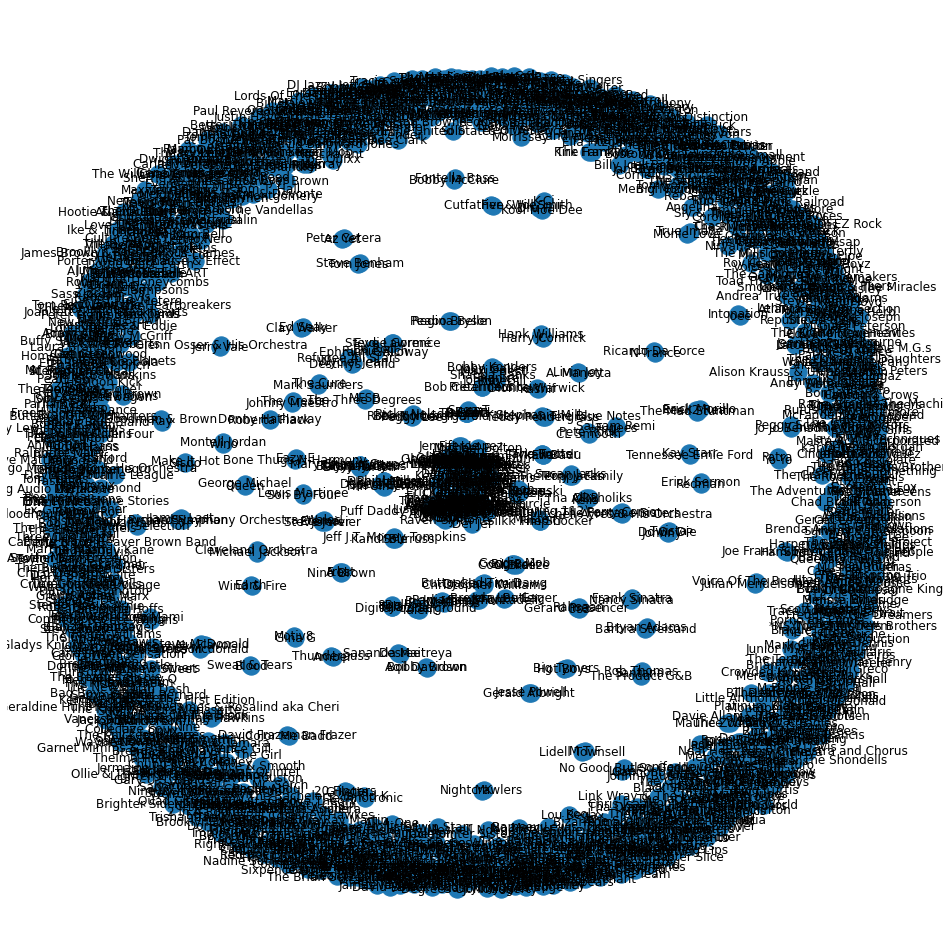

In [ ]:
plt.figure(3,figsize=(13,13)) 
nx.draw(G, with_labels=True)

In [ ]:
#CREAR RED DE GÉNEROS 
nx.write_graphml(G, "/content/gdrive/Shareddrives/SOC/Proyecto_Final/90s_colaboration_graph.graphml")

In [ ]:
#prueba de atributos de nodos
sorted(nx.get_node_attributes(G, "danceability").items(), key=lambda item: item[1], reverse= True)

[('Daft Punk', 0.956),
 ('Freak Nasty', 0.953),
 ('2nd II None', 0.9505),
 ('Hot Chocolate', 0.95),
 ('Puff Daddy & Faith Evans (Featuring 112)', 0.9420000000000001),
 ('Chubb Rock', 0.932),
 ('Los Del Rio', 0.927),
 ('Utfo', 0.925),
 ('Joe Cooley', 0.9209999999999999),
 ('Rodney O', 0.9209999999999999),
 ('WC', 0.9209999999999999),
 ('Sir Mix-A-Lot', 0.9199999999999999),
 ('Big Boi', 0.9179999999999999),
 ('Cool Breeze', 0.9179999999999999),
 ('Grand Puba', 0.912),
 ('The Home Team', 0.91),
 ('Candyman', 0.9079999999999999),
 ('Goodie Mob', 0.90525),
 ('Too $hort', 0.9036),
 ('GZA', 0.903),
 ('RZA', 0.903),
 ('Raekwon', 0.903),
 ('Wu-Tang Clan', 0.903),
 ('Parliament Funkadelic', 0.902),
 ('Channel Live', 0.9009999999999999),
 ('Funkdoobiest', 0.899),
 ('M People', 0.899),
 ('Central Line', 0.8959999999999999),
 ('Jermaine Dupri', 0.895),
 ('20 Fingers', 0.894),
 ('Gillette', 0.894),
 ('Kelis', 0.891),
 ('Lidell Townsell', 0.8880000000000001),
 ('M T F', 0.8880000000000001),
 ('JUVENI